### Dataset Summary figure

Please download the dataset at [Harvard Dataverse](https://doi.org/10.7910/DVN/OFN15B)

<blockquote style="background-color:#fff8e1; border-left:5px solid #ffeb3b; padding:10px 20px; color:#333; font-style:italic;">
  ⚠️ <strong>Note:</strong> Dataset versions ≤ <strong>2.0</strong> contain only a <strong>10%</strong> sample of the full data.<br>
  As a result, figures derived from these versions may differ from those reported in the paper.
</blockquote>



In [ ]:
%pip install langcodes tqdm numpy seaborn matplotlib

In [1]:
from figure2 import *

In [2]:
data_dir= '/cta/mofadata/harvard_dataverse' # path of the dataset
countries=get_countries(data_dir)

country_dicts = get_country_dicts(countries)
combined_dicts = create_combined_dict(country_dicts)

100%|██████████| 249/249 [00:00<00:00, 374598.89it/s]


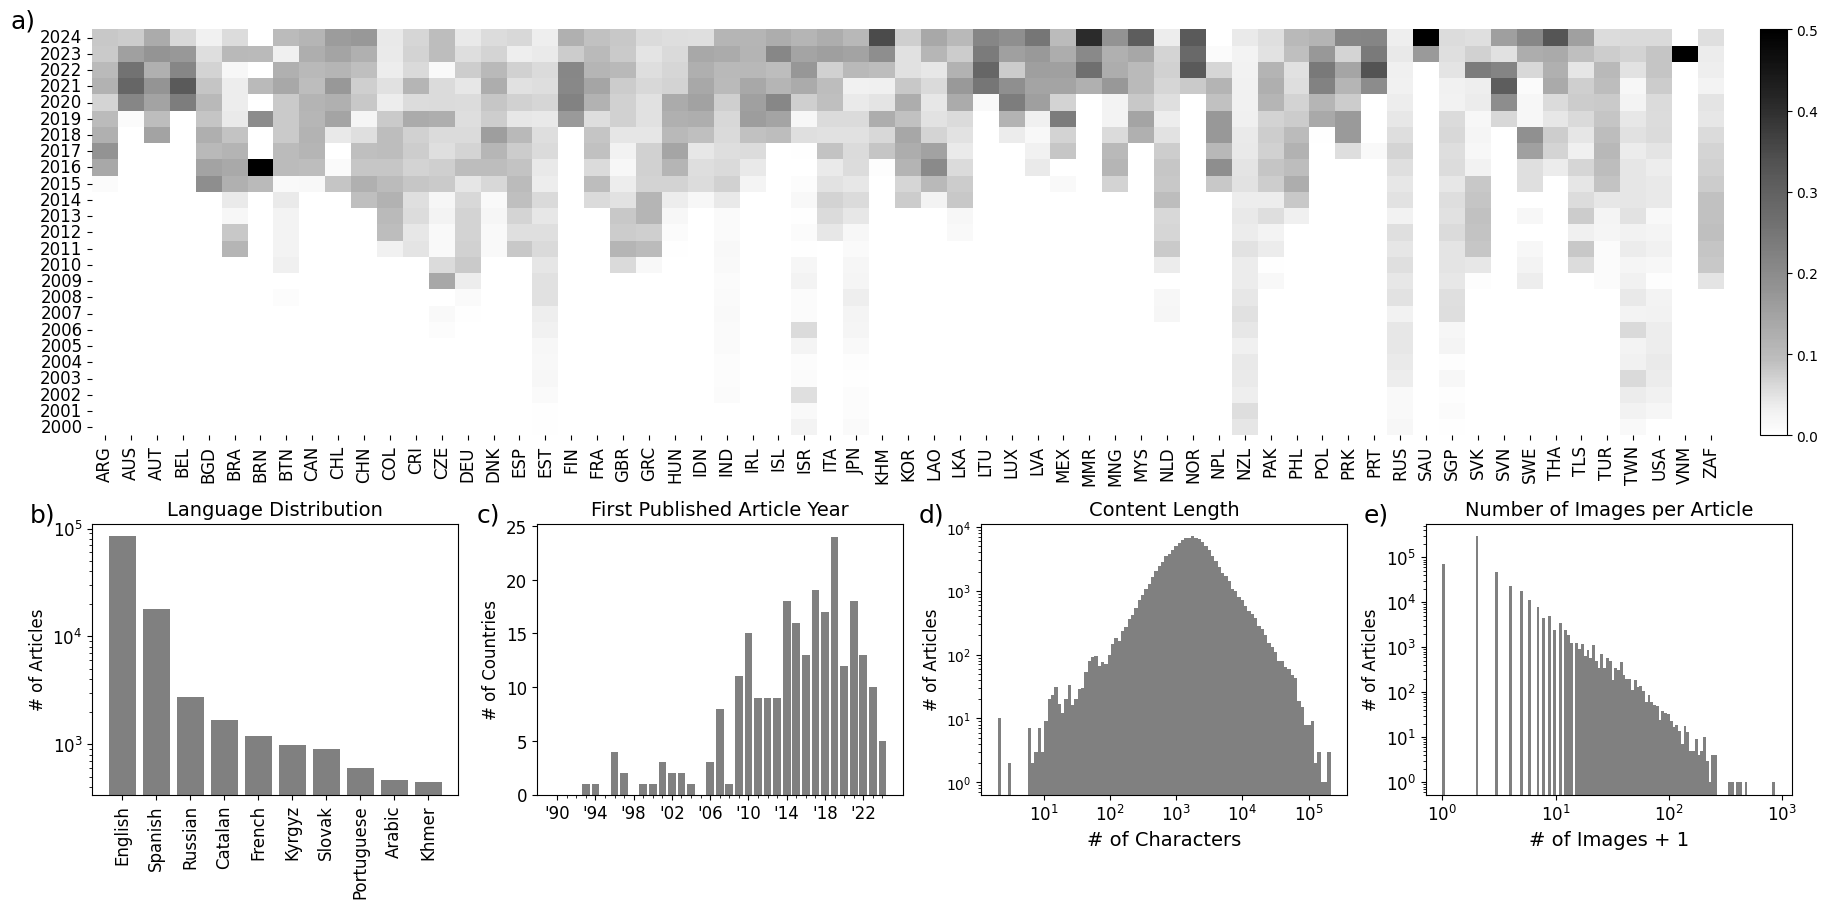

In [3]:
fig = plt.figure(figsize=(18,9))

gs = GridSpec(ncols=4,nrows=2, figure=fig, 
              height_ratios=[1.5,1], width_ratios=[1,1,1,1])

# a)
ax0 = fig.add_subplot(gs[0, :])
plot_heatmap(combined_dicts,2000, ax=ax0)

# b)
ax1 = fig.add_subplot(gs[1, 0])
languages = get_language_counts(countries)
plot_languages(languages, ax=ax1)

# c)
ax2 = fig.add_subplot(gs[1, 1])
plot_start_years(country_dicts, ax=ax2)

# d)
ax3 = fig.add_subplot(gs[1, 2])
length_dist = get_content_length_distribution(countries)
plot_content_length_dist(length_dist,ax=ax3)

# e)
ax4 = fig.add_subplot(gs[1, 3])
image_counts = get_image_counts(countries)
plot_image_counts(image_counts,ax=ax4)


plt.subplots_adjust(hspace=0.2, wspace=0.2)
fig.tight_layout()

# Shrinking first figure
pos = ax0.get_position()
ax0.set_position([pos.x0, pos.y0, pos.width * 0.96, pos.height])

cax = fig.add_axes([
    ax0.get_position().x1 + 0.02,  # Keep it slightly to the right of ax4
    ax0.get_position().y0,  # Align with the bottom row
    0.015,  # Width of the colorbar
    ax0.get_position().height  # Match height to ax4
])

cb = fig.colorbar(ax0.collections[0], cax=cax)

# Subplot Labels
labels = [ 'b)', 'c)', 'd)', 'e)']
axes = [ ax1, ax2, ax3, ax4]

ax0.text(-0.035, 1.05, 'a)', transform=ax0.transAxes, 
            size=18, va='top', ha='right')

for label, ax in zip(labels, axes):
    ax.text(-0.1, 1.08, label, transform=ax.transAxes, 
            size=18, va='top', ha='right')

# plt.savefig('./some_path.pdf')
plt.show()